## Feature Scaling

1. Standardization
2. Normalization-Min Max Scaler
3. Unit Vector

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# z_score = (xi - x_mean)/std

In [4]:
import numpy as np
mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])
print(mean, std)

19.785942622950824 8.88415057777113


In [5]:
normalized_data = []
for i in list(df['total_bill']):
    z_score = (i - mean)/std
    normalized_data.append(z_score)

In [8]:
normalized_data[0:5]

[-0.3147113050904947,
 -1.0632353132988699,
 0.13777989987156108,
 0.4383151031672544,
 0.5407447042905058]

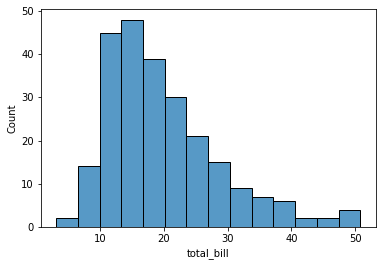

In [9]:
sns.histplot(df['total_bill'])

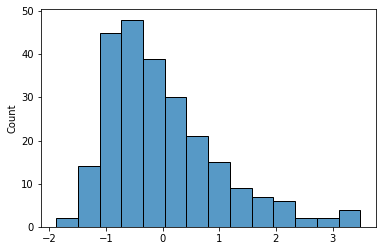

In [10]:
sns.histplot(normalized_data)

In [ ]:
# Using apply and function

In [14]:
def normal(df):
    z_score = (df - mean)/std
    return z_score

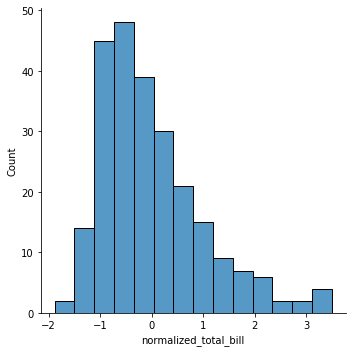

In [15]:
df['normalized_total_bill'] = df['total_bill'].apply(normal)
sns.displot(df['normalized_total_bill'])

In [ ]:
# sklearn library

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
scaler.fit(df[['total_bill']])
# fit - it will create mean and std

StandardScaler()

In [22]:
# transform, it will apply mean and std created in fit section to the dataset
df['total_bill_sk_scalled'] = scaler.transform(df[['total_bill']])
df[['total_bill','total_bill_sk_scalled']]

,total_bill,total_bill_sk_scalled
0,16.99,-0.314711
1,10.34,-1.063235
2,21.01,0.137780
3,23.68,0.438315
4,24.59,0.540745
...,...,...
239,29.03,1.040511
240,27.18,0.832275
241,22.67,0.324630
242,17.82,-0.221287


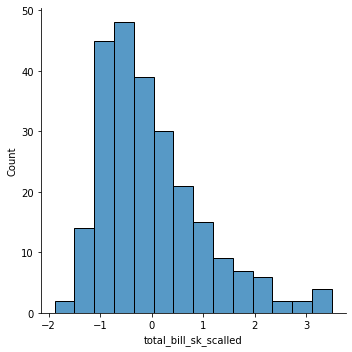

In [25]:
sns.displot(df['total_bill_sk_scalled'])

In [26]:
# or
import pandas as pd

pd.DataFrame(scaler.fit_transform(df[['total_bill']]), columns=['total_bill_scaler'])

,total_bill_scaler
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [27]:
pd.DataFrame(scaler.fit_transform(df[['total_bill', 'tip']]), columns=['total_bill_scaler', 'tip'])

,total_bill_scaler,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [30]:
# Now transform any new data based on total_bill - mean and std we created earlier
scaler.transform([[13, 56]])

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.76382571, 38.38479366]])

## Normalization - Min Max scaler

In [31]:
df = sns.load_dataset('taxis')

In [32]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_max = MinMaxScaler()

In [35]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [ ]:
# If using fit - it will create required values based on the columns - for example x_min, x_max
# after using fit, you need to use .transform to apply values created in .fit 
# or you can directly create fit_transform - it will create fit and transform the data internally

In [36]:
min_max.transform([[1.6, 7.0, 43]])

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.04359673, 0.04026846, 1.29518072]])

## Unit Vector

In [37]:
from sklearn.preprocessing import normalize

In [38]:
normalize_d = normalize(df[['distance','fare','tip']])

In [41]:
pd.DataFrame(normalize_d, columns=['distance','fare','tip'])

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
